In [2]:
from urllib.request import urlopen

data = []
url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat"
for line in urlopen(url):
    vals = line.split(b" ")
    
    # skip the headers
    if vals[0] == b"CID": continue 
    
    data.append({"z": float(vals[2]), "mu": float(vals[10])})

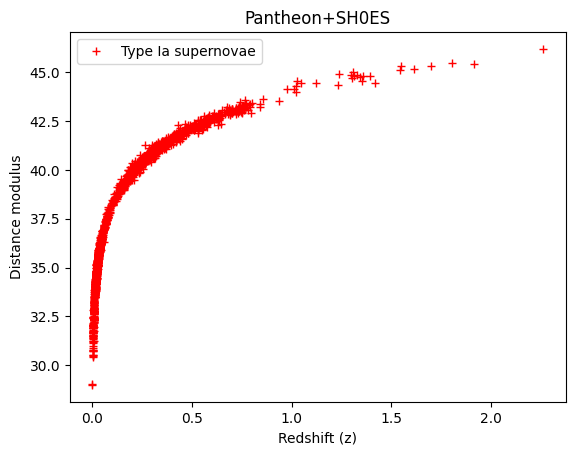

In [3]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,8))
    
dataz = [row["z"] for row in data] 
datamu = [row["mu"] for row in data] 
plt.plot(dataz, datamu, "r+", label = "Type Ia supernovae")

plt.title("Pantheon+SH0ES")
plt.xlabel("Redshift (z)")
plt.ylabel("Distance modulus")
plt.legend()

#plt.savefig('cp4.png',  bbox_inches='tight')
plt.show()

In [7]:
import cosmolopy.magnitudes as cm

# calculates Lambda-CDM
cosmo = {'omega_M_0' : 0.334, 'omega_lambda_0' : 0.666, 
         'h' : 0.70, 'omega_k_0': 0}

def calculateMu(z):
    return cm.distance_modulus(z, **cosmo)

In [5]:
def sse():
    totalErrors = 0
    for sn in data:
        
        error = calculateMu(sn["z"]) - sn["mu"]
        totalErrors = totalErrors + error**2

    return totalErrors

In [11]:
lowestSSE = {"sse": -1}
sses = []
H0s = []

for i in range(100):
    H0 = 65 + i/10
    cosmo["h"] = H0 / 100
    
    SSE = sse()
    sses.append(SSE)
    H0s.append(H0)
    
    if lowestSSE["sse"] == -1 or SSE < lowestSSE["sse"]:
        lowestSSE = {"H0": H0, "sse": SSE}

print(lowestSSE)

{'H0': 70.4, 'sse': 55.0103290254877}


In [10]:
import math

def calculateMu(z):
    d_L = 299792/H0 * (1+z) * math.log(1+z)
    mu = 5 * math.log10(d_L) + 25
    return mu

In [ ]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,8))
    
plt.plot(H0s, sses, label = "$\Lambda$CDM")

plt.title("SSE")
plt.xlabel("$H_0$")
plt.ylabel("SSE")
#plt.legend()

#plt.savefig('cp4.png',  bbox_inches='tight')
plt.show()